In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
# Put the clinical dataset first and merge left to get the same results as the output provided
combined_df = pd.merge(clinical_df, mouse_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# mean_tumor_vol

# Convert to DataFrame
mean_tumor_vol_df = pd.DataFrame(mean_tumor_vol)

# Preview DataFrame
# mean_tumor_vol_df

# Need to change the reset the indexing so [Drug] is listed as a column heading instead of an index
mean_tumor_vol_df = mean_tumor_vol_df.reset_index()
mean_tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [13]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = combined_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# sem_tumor_vol

# Convert to DataFrame
sem_tumor_vol_df = pd.DataFrame(sem_tumor_vol)

# Preview DataFrame
# sem_tumor_vol_df

# Need to reset the indexing so [Drug] is listed as a column heading instead of an index
sem_tumor_vol_df = sem_tumor_vol_df.reset_index()
sem_tumor_vol_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [16]:
# Minor Data Munging to Re-Format the Data Frames
# Had to look up how to move [Drug] column to top; found pivot function 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
# We want to index on Timpoint and use Drug as our new frame columns
# df.pivot(index= "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

mean_tumor_vol_df_pivot = mean_tumor_vol_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# mean_tumor_vol_df_pivot

sem_tumor_vol_df_pivot = sem_tumor_vol_df.pivot(index= "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
# sem_tumor_vol_df_pivot

# Preview that Reformatting worked
mean_tumor_vol_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


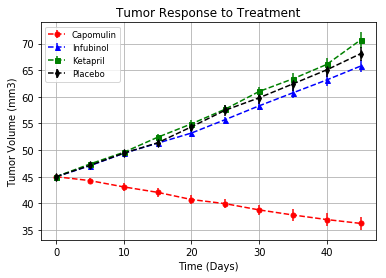

<Figure size 432x288 with 0 Axes>

In [62]:
# Generate the Plot (with Error Bars)
# Looked up Error Bar documentation
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html
# x = mean_tumor_vol_df_pivot.index, y = mean_tumor_vol_df_pivot["Drug Name"], yerr = sem_tumor_vol_df_pivot["Drug Name"]
# Try to most accurately recreate the figure provided 
# I am using other keyword arguments for visualization such as color, marker, markersize linestyle

plt.errorbar(mean_tumor_vol_df_pivot.index, mean_tumor_vol_df_pivot["Capomulin"], 
             yerr=sem_tumor_vol_df_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed")

plt.errorbar(mean_tumor_vol_df_pivot.index, mean_tumor_vol_df_pivot["Infubinol"], 
             yerr=sem_tumor_vol_df_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed")

plt.errorbar(mean_tumor_vol_df_pivot.index, mean_tumor_vol_df_pivot["Ketapril"], 
             yerr=sem_tumor_vol_df_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed")

plt.errorbar(mean_tumor_vol_df_pivot.index, mean_tumor_vol_df_pivot["Placebo"], 
             yerr=sem_tumor_vol_df_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed")

# Add title, x&y labels, add grid lines and legend
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small")

plt.show()

# Save the Figure
plt.savefig("Tumor_Response.png")


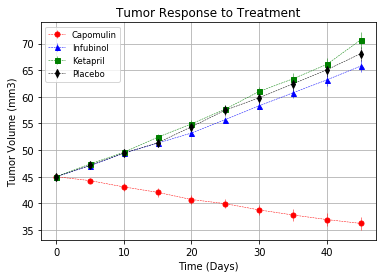

In [5]:
# Show the Figure
# plt.show()

## Metastatic Response to Treatment

In [50]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_metsites = combined_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# mean_metsites

# Convert to DataFrame
mean_metsites_df = pd.DataFrame(mean_metsites)
# mean_metsites_df.head()

# Preview DataFrame
mean_metsites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [53]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_metsites = combined_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# sem_metsites

# Convert to DataFrame
sem_metsites_df = pd.DataFrame(sem_metsites)
# sem_metsites_df.head()

# Preview DataFrame
sem_metsites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [56]:
# Reset Index so our next step is easier to do
# Need to reset the indexing so [Drug] is listed as a column heading instead of an index
mean_metsites_df = mean_metsites_df.reset_index()
# mean_metsites_df

sem_metsites_df = sem_metsites_df.reset_index()
# sem_metsites_df

In [61]:
# Minor Data Munging to Re-Format the Data Frames
# Repeat same process with pivot
mean_metsites_df_pivot = mean_metsites_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# mean_metsites_df_pivot.head()

sem_metsites_df_pivot = sem_metsites_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# sem_metsites_df_pivot.head()

# Preview that Reformatting worked
mean_metsites_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
# When I ran .head() for both mean and sem for metsites, I outputted a different set of values than provided
# Upon further inspection I believe this display is actually mean_tumor_vol_df_pivot.head() not mean_metsites_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


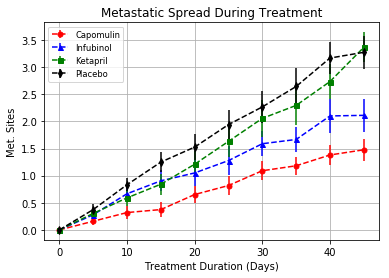

In [64]:
# Generate the Plot (with Error Bars)
# Follow same logic as Tumor Response Treatment
plt.errorbar(mean_metsites_df_pivot.index, mean_metsites_df_pivot["Capomulin"], 
             yerr=sem_metsites_df_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed")

plt.errorbar(mean_metsites_df_pivot.index, mean_metsites_df_pivot["Infubinol"], 
             yerr=sem_metsites_df_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed")

plt.errorbar(mean_metsites_df_pivot.index, mean_metsites_df_pivot["Ketapril"], 
             yerr=sem_metsites_df_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed")

plt.errorbar(mean_metsites_df_pivot.index, mean_metsites_df_pivot["Placebo"], 
             yerr=sem_metsites_df_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed")

# Add title, x&y labels, add grid lines and legend
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small")

# plt.show()

# Save the Figure
plt.savefig("Met_Spread.png")

# Show the Figure
plt.show()

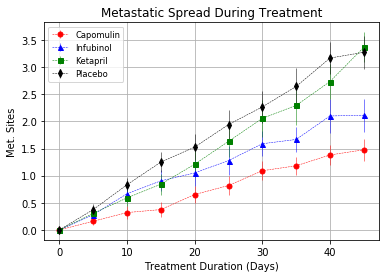

## Survival Rates

In [70]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# mice_count

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})
# mice_count_df.head()

# Preview DataFrame
mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [71]:
# Reset Index so our next step is easier to do
# Need to reset the indexing so [Drug] is listed as a column heading instead of an index
mice_count_df = mice_count_df.reset_index()
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [72]:
# Minor Data Munging to Re-Format the Data Frames
# Repeat same process with pivot
mice_count_df_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
mice_count_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


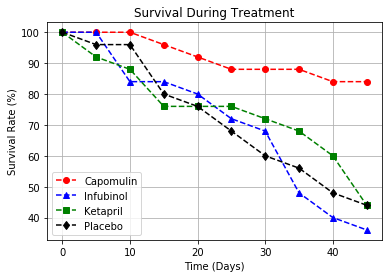

In [75]:
# Generate the Plot (Accounting for percentages)
# When plotting we have to multiple by 100 and then divide by 25 (or multiple by 4)
plt.plot(4 * mice_count_df_pivot["Capomulin"], "ro", linestyle="dashed")
plt.plot(4 * mice_count_df_pivot["Infubinol"], "b^", linestyle="dashed")
plt.plot(4 * mice_count_df_pivot["Ketapril"], "gs", linestyle="dashed")
plt.plot(4 * mice_count_df_pivot["Placebo"], "kd", linestyle="dashed")


# Label title, x-axis, y-axis, create grid lines and legend
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best")

# Save the Figure

# Show the Figure
plt.show()

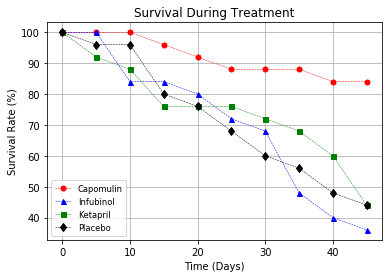

## Summary Bar Graph

In [79]:
# Calculate the percent changes for each drug
# We are going to use iloc
perc_drug_change = 100 * (mean_tumor_vol_df_pivot.iloc[-1] - mean_tumor_vol_df_pivot.iloc[0]) / mean_tumor_vol_df_pivot.iloc[0]
# per_drug_change

# Display the data to confirm
perc_drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [80]:
# Store all Relevant Percent Changes into a Tuple
perc_tuple = (
                perc_drug_change["Capomulin"], 
                perc_drug_change["Infubinol"], 
                perc_drug_change["Ketapril"], 
                perc_drug_change["Placebo"]
            )

perc_tuple
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

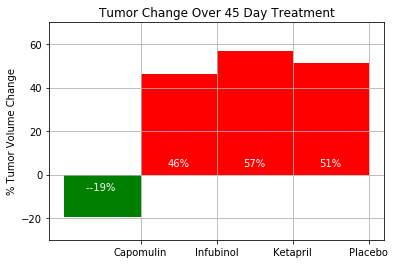